In [1]:
#importing pandas and numpy libraries to do data cleaning in the dataset.
import pandas as pd 
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
#Loading the data with help of pandas function read and displaying first 5 rows and columns in our dataset.
data=pd.read_csv("Training.csv")
data.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


# Data Cleaning

In [3]:
data['Unnamed: 133'].value_counts

<bound method IndexOpsMixin.value_counts of 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4915   NaN
4916   NaN
4917   NaN
4918   NaN
4919   NaN
Name: Unnamed: 133, Length: 4920, dtype: float64>

#dropping the column: Unnamed, since it has only NAN value, its of no use.

In [4]:

data=data.drop(columns=['Unnamed: 133'])

In [5]:
#With isna() function we could understand all the columns in our dataset has value, i.e, no NAN found in the dataset.
data.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

#The datatypes of all columns in our dataset is in int64 except output column which is of datatype Object1.

In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [7]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.shape
#our dataset has 4920 columns and 133 rows

(4920, 133)


#To find whether our dataset has outliers

In [9]:
#we could see values herer are either 0 or 1, it clarifies us that there are no outliers.
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Here, we conclude our data preprocesing by completing the process of checking about missing values, NAN, outliers,
#datatypes and removing irrelevant columns and deleting duplicate entries.

# Univarate Bivariate and Multivariate Analysis
# EDA

In [10]:
#since we have only either 1 or 0 as values, we directly performing Bivariate Analysis.
data.cov()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,0.118839,0.040188,0.016491,-0.006219,-0.003026,-0.022356,-0.019162,0.014517,-0.006219,-0.003026,...,-0.003026,-0.003026,-0.003026,-0.003194,-0.003194,-0.003194,-0.003194,-0.003194,-0.003194,-0.003194
skin_rash,0.040188,0.134261,0.016009,-0.007210,-0.003508,-0.003961,0.021697,0.012306,-0.007210,-0.003508,...,0.017228,0.017228,0.017228,0.018253,0.018253,0.018253,0.018253,0.018253,0.018253,0.018253
nodal_skin_eruptions,0.016491,0.016009,0.021474,-0.000991,-0.000482,-0.003561,-0.003052,-0.000991,-0.000991,-0.000482,...,-0.000482,-0.000482,-0.000482,-0.000509,-0.000509,-0.000509,-0.000509,-0.000509,-0.000509,-0.000509
continuous_sneezing,-0.006219,-0.007210,-0.000991,0.043095,0.018525,0.034152,-0.006274,-0.002036,-0.002036,-0.000991,...,-0.000991,-0.000991,-0.000991,-0.001046,-0.001046,-0.001046,-0.001046,-0.001046,-0.001046,-0.001046
shivering,-0.003026,-0.003508,-0.000482,0.018525,0.021474,0.015955,-0.003052,-0.000991,-0.000991,-0.000482,...,-0.000482,-0.000482,-0.000482,-0.000509,-0.000509,-0.000509,-0.000509,-0.000509,-0.000509,-0.000509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.003194,0.018253,-0.000509,-0.001046,-0.000509,-0.003759,0.018734,-0.001046,-0.001046,-0.000509,...,-0.000509,-0.000509,-0.000509,0.021419,0.021419,0.022638,0.021419,-0.000537,-0.000537,-0.000537
inflammatory_nails,-0.003194,0.018253,-0.000509,-0.001046,-0.000509,-0.003759,0.018734,-0.001046,-0.001046,-0.000509,...,-0.000509,-0.000509,-0.000509,0.021419,0.021419,0.021419,0.022638,-0.000537,-0.000537,-0.000537
blister,-0.003194,0.018253,-0.000509,-0.001046,-0.000509,-0.003759,-0.003222,-0.001046,-0.001046,-0.000509,...,-0.000509,-0.000509,-0.000509,-0.000537,-0.000537,-0.000537,-0.000537,0.022638,0.021419,0.021419
red_sore_around_nose,-0.003194,0.018253,-0.000509,-0.001046,-0.000509,-0.003759,-0.003222,-0.001046,-0.001046,-0.000509,...,-0.000509,-0.000509,-0.000509,-0.000537,-0.000537,-0.000537,-0.000537,0.021419,0.022638,0.021419


In [11]:
#The reason for very low positive covariation between the variables are, the given variables are all of symptoms of a disease,
#a symptom for one disease may/may not be symptom for other disease hence the low and negative covariance results.

In [12]:
data.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,1.000000,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120


In [13]:
#The highest correlation in the above table is between blister and red_sore_around_nose,which is 79.66

#How many types of symptoms are there for each diseases?

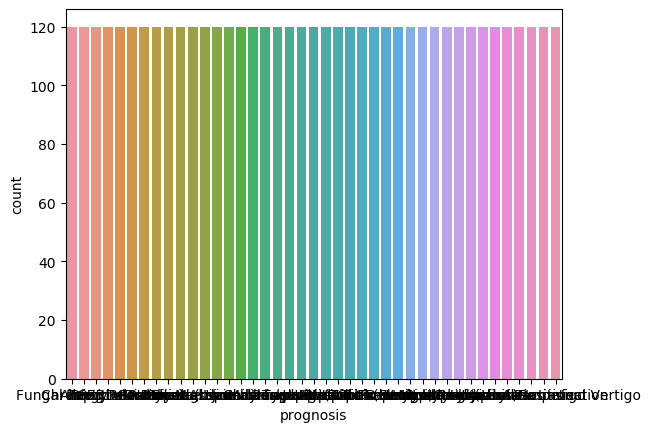

In [14]:
import seaborn as sns
sns.countplot(x='prognosis',data=data)

#finding symptoms count

In [15]:
count=np.count_nonzero(data['itching'])

In [16]:
count

678

In [17]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [18]:
Count=[]
for columnName in data.columns:
    count=np.count_nonzero(data[columnName])
    print(columnName)
    Count.append(count)
    
    

itching
skin_rash
nodal_skin_eruptions
continuous_sneezing
shivering
chills
joint_pain
stomach_pain
acidity
ulcers_on_tongue
muscle_wasting
vomiting
burning_micturition
spotting_ urination
fatigue
weight_gain
anxiety
cold_hands_and_feets
mood_swings
weight_loss
restlessness
lethargy
patches_in_throat
irregular_sugar_level
cough
high_fever
sunken_eyes
breathlessness
sweating
dehydration
indigestion
headache
yellowish_skin
dark_urine
nausea
loss_of_appetite
pain_behind_the_eyes
back_pain
constipation
abdominal_pain
diarrhoea
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
malaise
blurred_and_distorted_vision
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
dizziness
cramps
bruising
obesity
swollen_legs
swollen_blood_vessels
puffy_face_and_eyes
enlarged_thyroi

In [19]:
for columnName in data.columns:
    count=np.count_nonzero(data[columnName])
    print(count)

678
786
108
222
108
798
684
222
222
108
108
1914
216
108
1932
114
114
114
228
456
228
456
108
114
564
1362
108
450
678
108
222
1134
912
570
1146
1152
120
228
228
1032
564
354
114
816
114
0
114
348
702
342
354
120
120
120
120
120
696
108
234
114
114
114
114
228
336
114
114
228
114
108
114
120
120
120
462
108
114
120
114
114
234
228
228
114
108
342
114
108
120
114
102
114
114
114
114
234
474
474
114
234
114
240
108
108
120
120
228
114
120
114
114
120
120
120
120
114
114
114
120
114
120
228
108
108
108
114
114
114
114
114
114
114
4920


How many symptoms for each diseases given?

In [20]:

for columnName in data.columns:
    count=np.count_nonzero(data[columnName])
    print(count,columnName)
    
    

678 itching
786 skin_rash
108 nodal_skin_eruptions
222 continuous_sneezing
108 shivering
798 chills
684 joint_pain
222 stomach_pain
222 acidity
108 ulcers_on_tongue
108 muscle_wasting
1914 vomiting
216 burning_micturition
108 spotting_ urination
1932 fatigue
114 weight_gain
114 anxiety
114 cold_hands_and_feets
228 mood_swings
456 weight_loss
228 restlessness
456 lethargy
108 patches_in_throat
114 irregular_sugar_level
564 cough
1362 high_fever
108 sunken_eyes
450 breathlessness
678 sweating
108 dehydration
222 indigestion
1134 headache
912 yellowish_skin
570 dark_urine
1146 nausea
1152 loss_of_appetite
120 pain_behind_the_eyes
228 back_pain
228 constipation
1032 abdominal_pain
564 diarrhoea
354 mild_fever
114 yellow_urine
816 yellowing_of_eyes
114 acute_liver_failure
0 fluid_overload
114 swelling_of_stomach
348 swelled_lymph_nodes
702 malaise
342 blurred_and_distorted_vision
354 phlegm
120 throat_irritation
120 redness_of_eyes
120 sinus_pressure
120 runny_nose
120 congestion
696 chest_

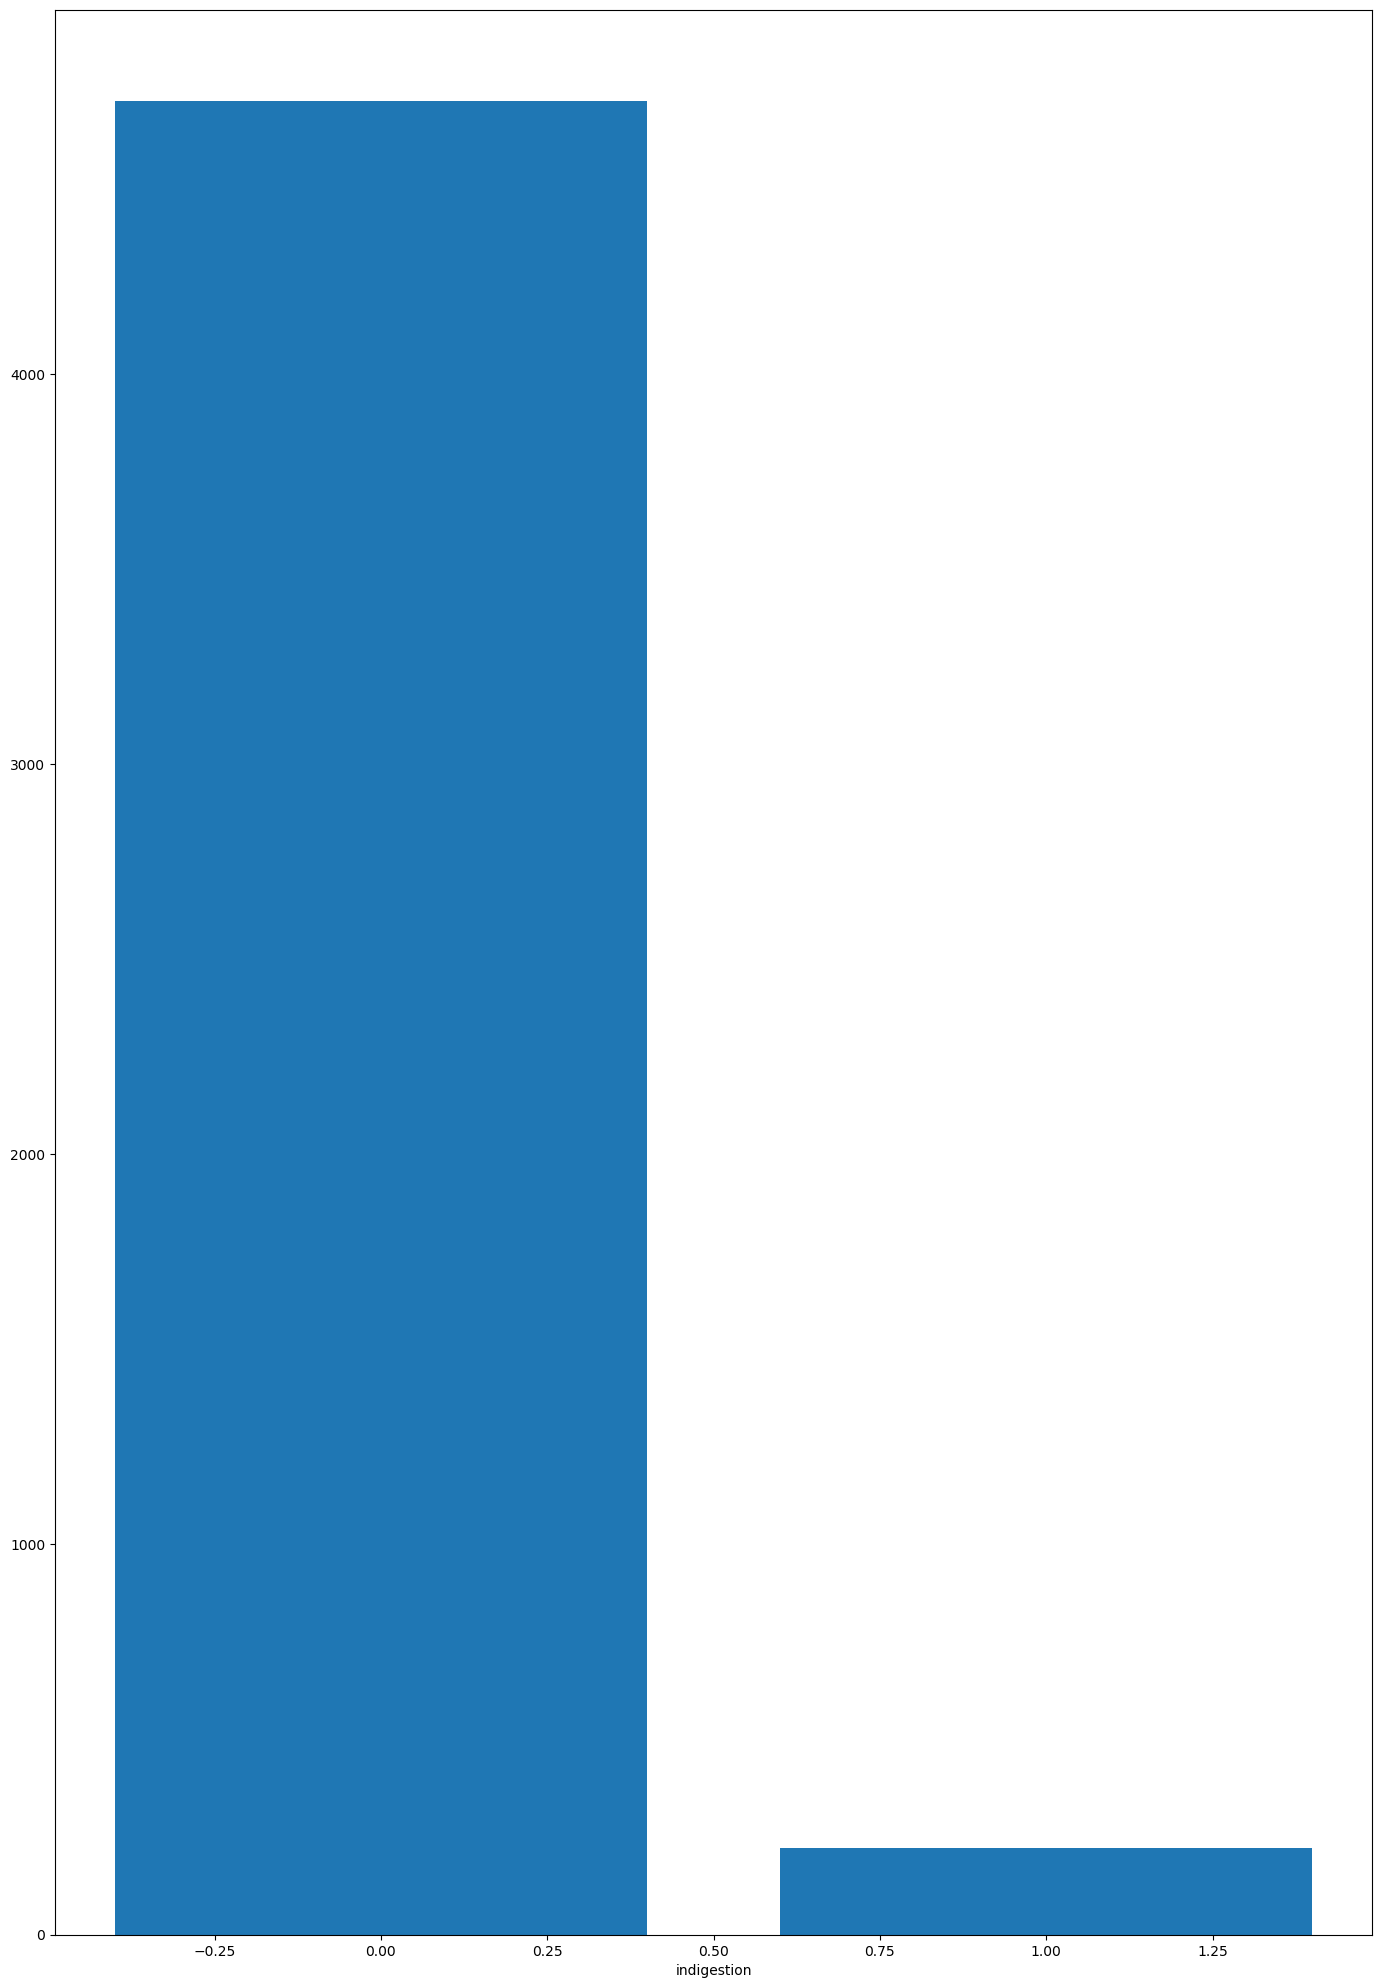

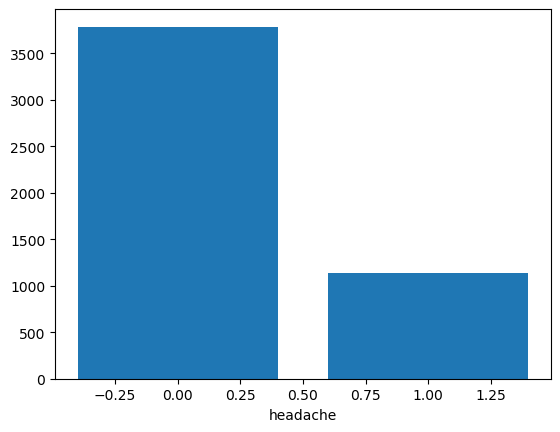

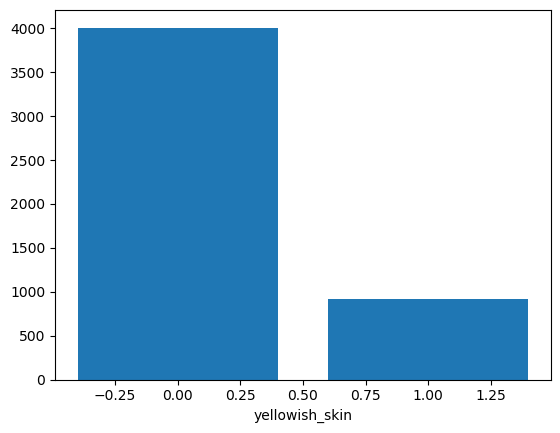

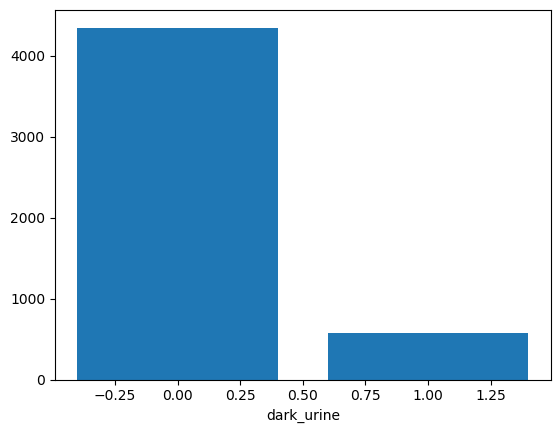

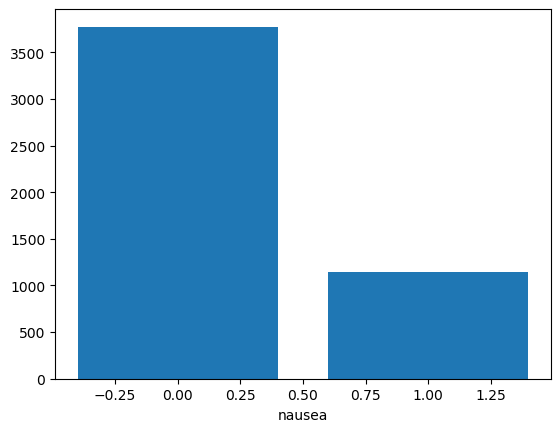

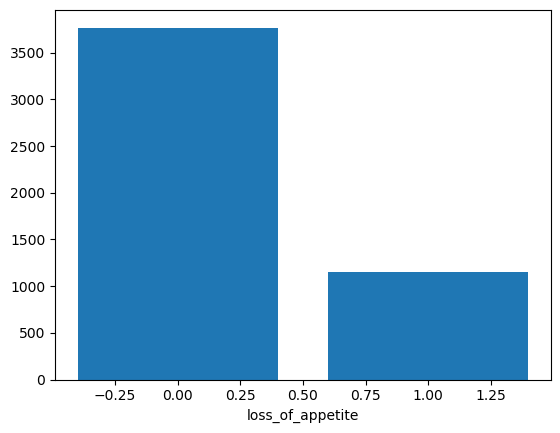

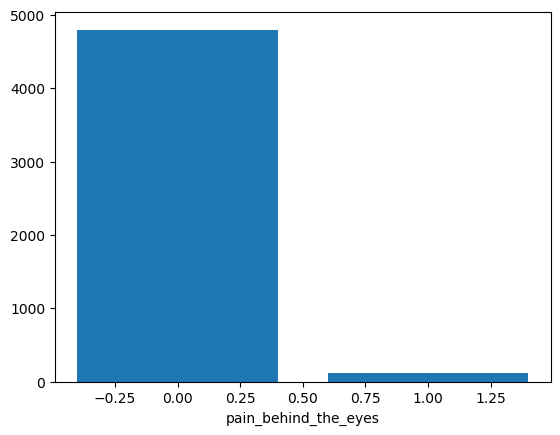

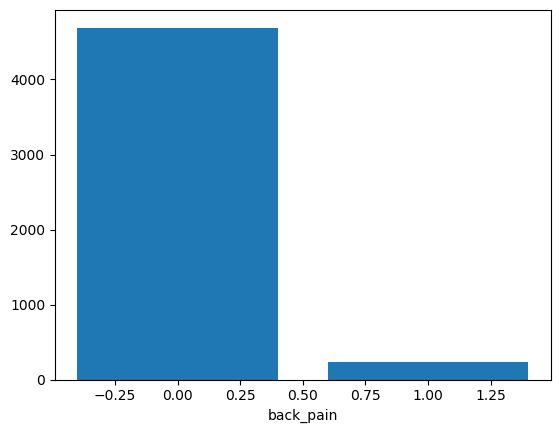

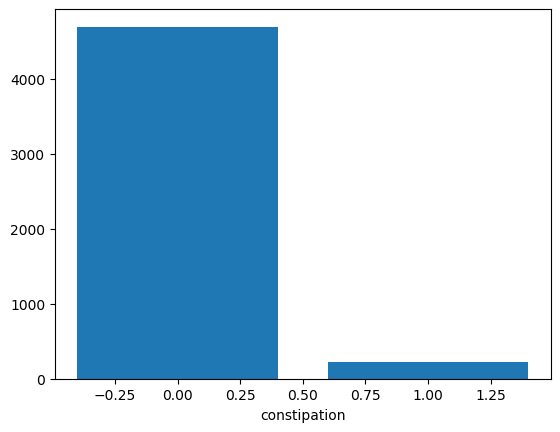

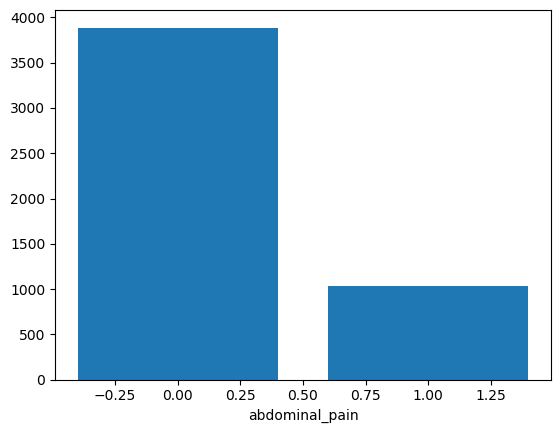

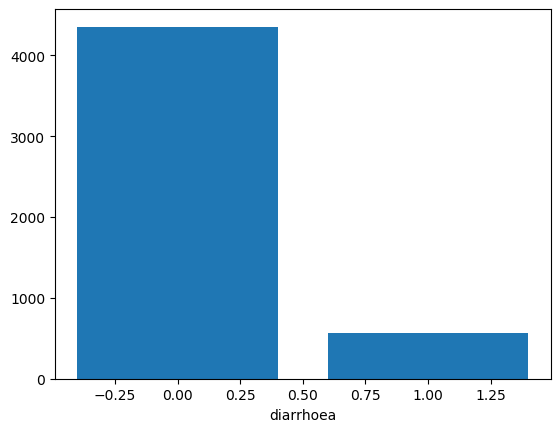

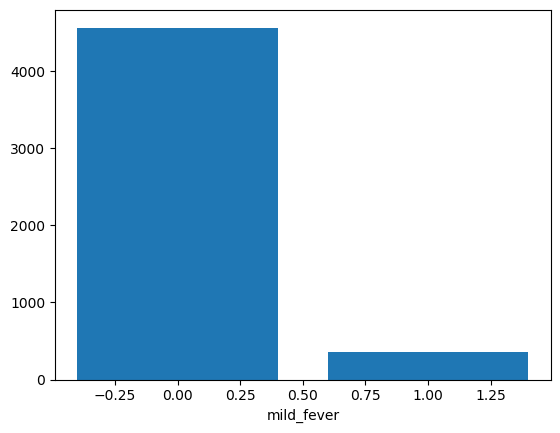

In [21]:
import matplotlib.pyplot as plt
features =['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever']
plt.figure(figsize = (17,25))
for i, feature in enumerate(features):    
    plt.bar(data[feature].value_counts().index.to_numpy(), data[feature].value_counts().values)
    plt.xlabel(feature)
    plt.show()

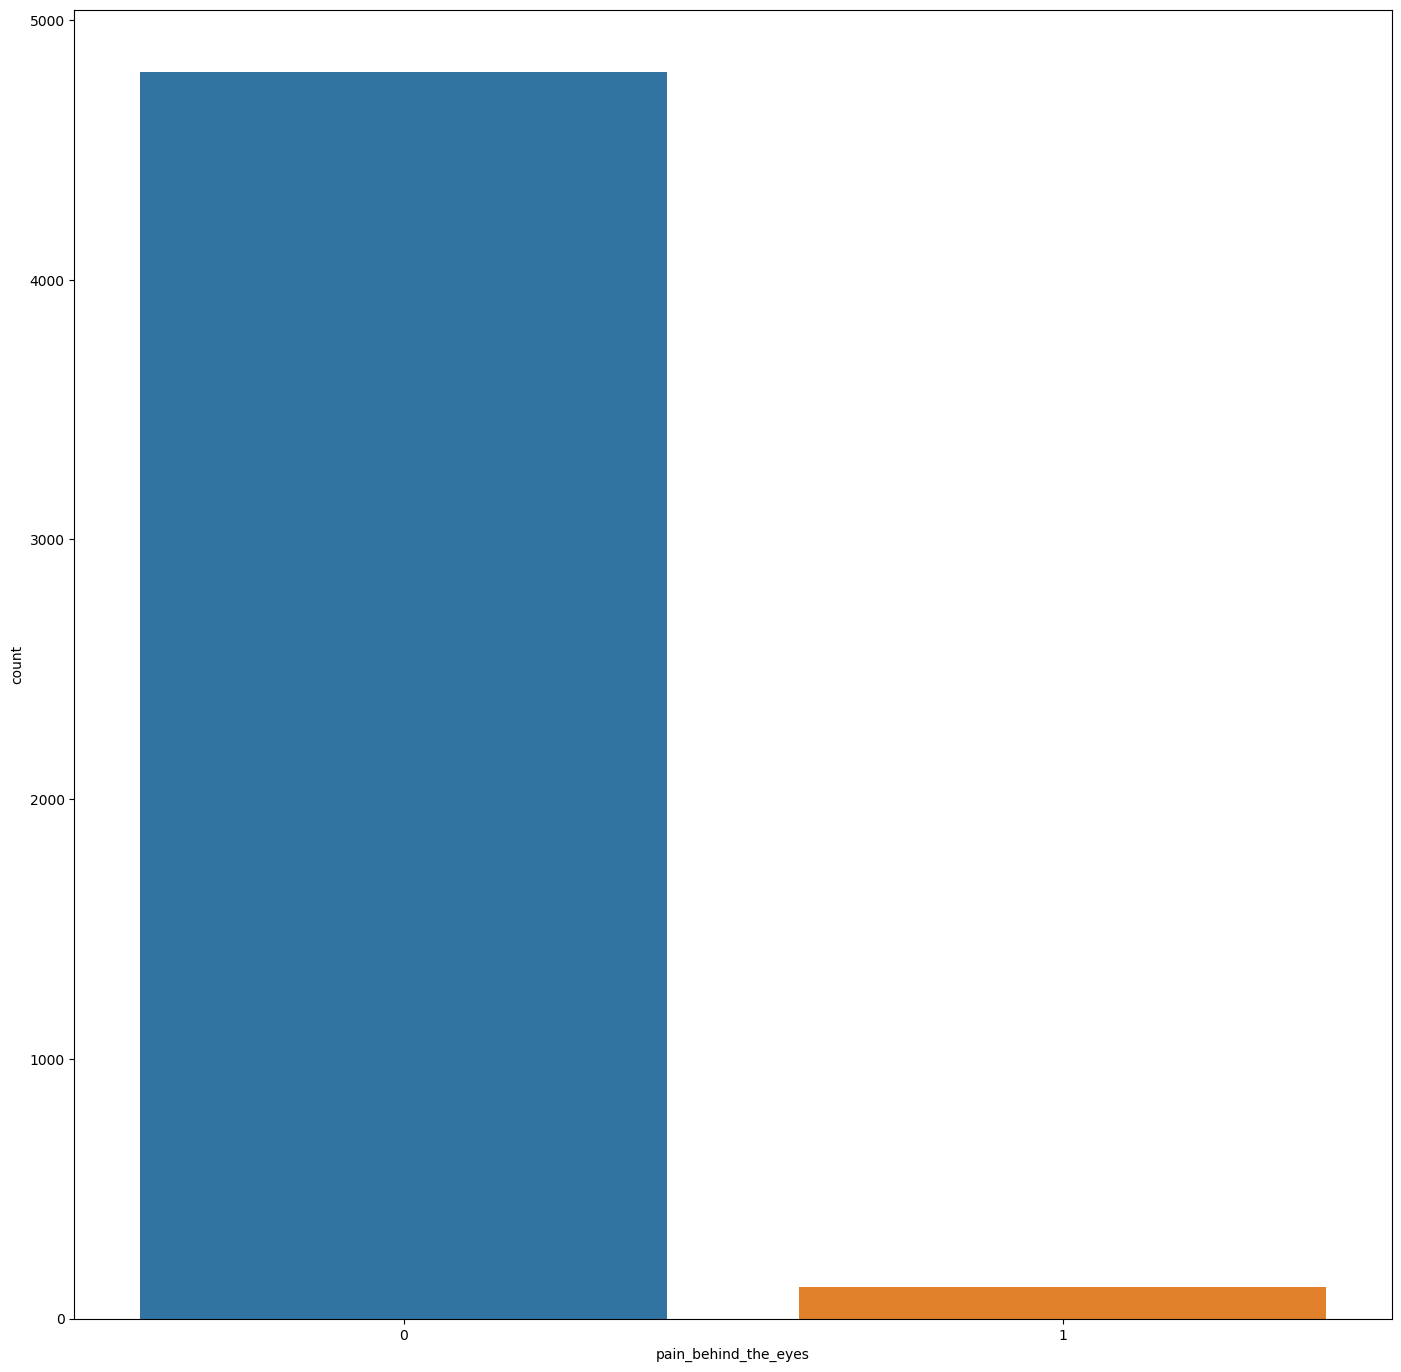

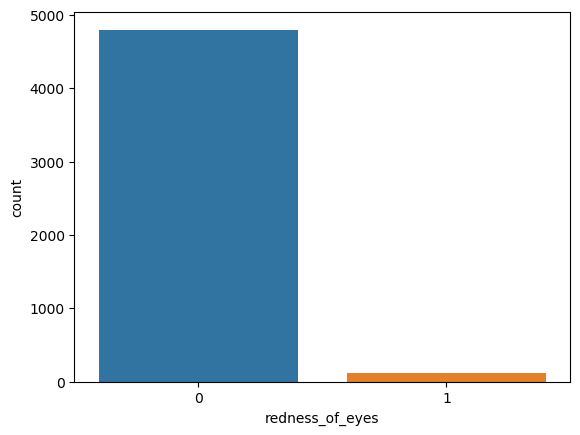

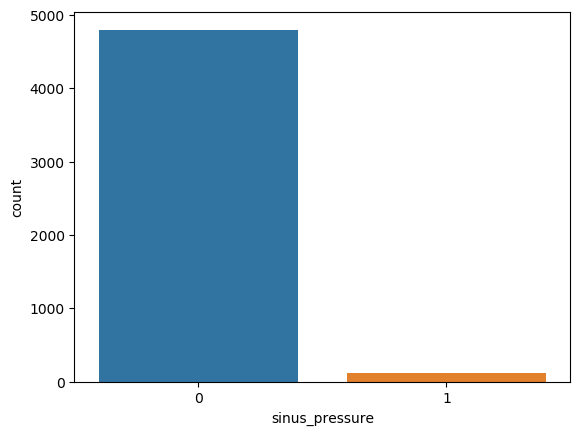

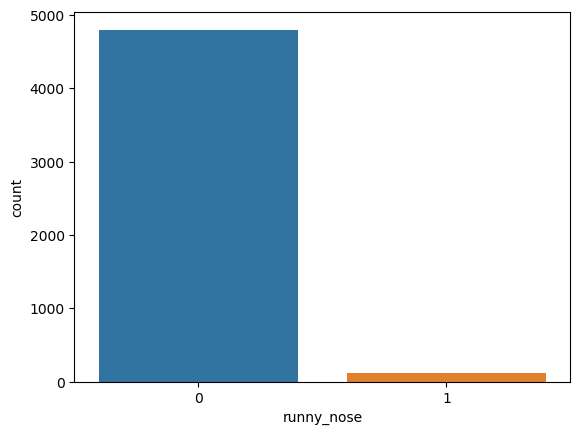

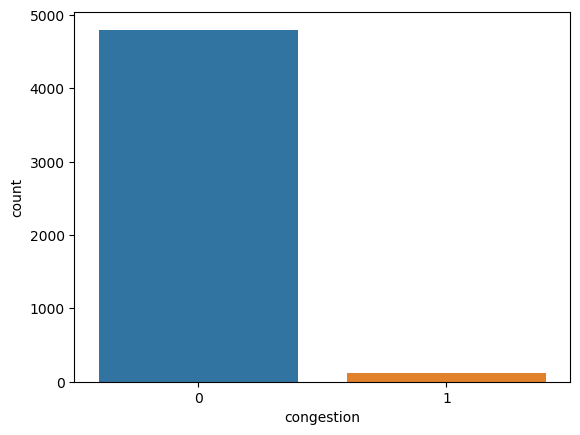

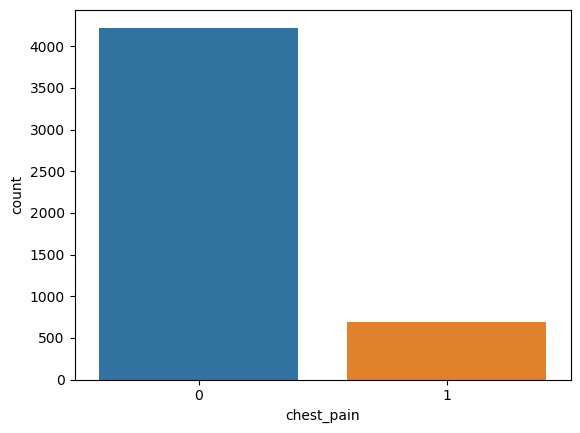

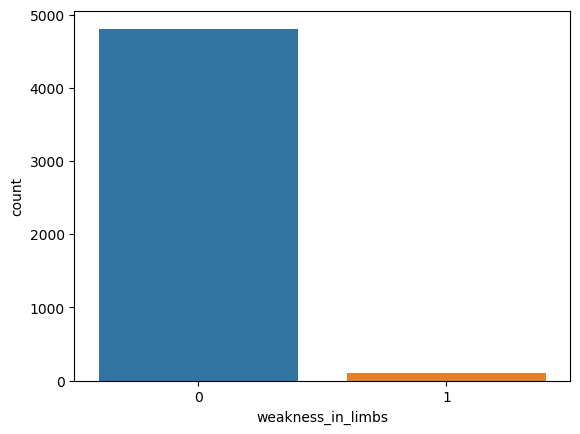

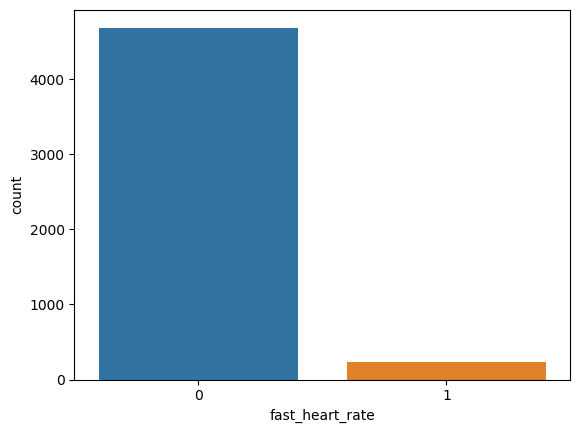

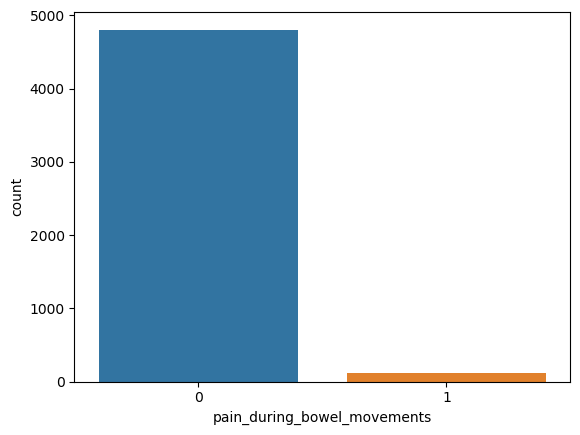

In [22]:
#Using Seaborn to visualize more features
features = ['pain_behind_the_eyes', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
       'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements']
plt.figure(figsize=(17,17))

for i, feature in enumerate(features):
    sns.countplot(x=feature,data=data)
    plt.xlabel(feature)
    plt.show()

Encoding the target variables into Numerical, using Label Encoder

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['prognosis']=encoder.fit_transform(data['prognosis'])


In [24]:
data['prognosis'].value_counts()

39    120
33    120
25    120
21    120
17    120
13    120
9     120
5     120
1     120
40    120
36    120
32    120
28    120
24    120
20    120
16    120
12    120
8     120
4     120
29    120
37    120
35    120
2     120
31    120
27    120
23    120
19    120
15    120
11    120
7     120
3     120
38    120
34    120
30    120
26    120
22    120
18    120
14    120
10    120
6     120
0     120
Name: prognosis, dtype: int64

In [25]:
data_test=pd.read_csv('Testing.csv')
data_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [ ]:
# AS we performed LabelEncoer with traning data, folowing the same with test data as well.

In [26]:
encoder = LabelEncoder()
data_test['prognosis']=encoder.fit_transform(data_test['prognosis'])
data_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,16
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,14




# Model Creation


#Our output is in numerical formal, so we opt to use Regession Algorithms to buld our model.

we choose Support Vector Mechine, Decision Tree and Random Forest Algorithms to build our model, according to the performance and its R Score value will select the best model.

In [27]:
#separating dependent and independent variables.
indep=data.drop(columns=['prognosis'])
dep=data['prognosis']

#Allocating training and test sets
x_train,y_train=data.drop(columns=['prognosis']),data['prognosis']
x_test,y_test=data_test.drop(columns=['prognosis']),data_test['prognosis']

In [28]:
from sklearn.svm import SVR
regressorSVR=SVR(kernel='rbf')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [29]:
def selectkbest(indep,dep,n):
    
    test=SelectKBest(score_func=chi2,k=n)
    fit1=test.fit(indep,dep)
    selectk_feature=fit1.transform(indep)
    return selectk_feature

In [30]:
def selectk_classification(rscoreSVM,rscoreDT,rscoreRF):
    dataframe=pd.DataFrame(index=['R_Score'],columns=['R_score','R_scoreDT','R_scoreRF'] )
    for number,index in enumerate(dataframe.index):
        dataframe['R_score'][index]=rscoreSVM[number]
        dataframe['R_scoreDT'][index]=rscoreDT[number]
        dataframe['R_scoreRF'][index]=rscoreRF[number]
        return dataframe

In [34]:
#SVM, Decision Tree, Random Forest model will be build and the respective R2Score will display.

rscoreSVM=[]
rscoreDT=[]
rscoreRF=[]

regressorSVR.fit(x_train,y_train)
ypred=regressorSVR.predict(x_test)
r_score=r2_score(y_test,ypred)
rscoreSVM.append(r_score)


regressorDT=DecisionTreeRegressor()
regressorDT.fit(x_train,y_train)
ypredDT=regressorDT.predict(x_test)
r_scoreDT=r2_score(y_test,ypredDT)
rscoreDT.append(r_scoreDT)

regressorRF=RandomForestRegressor()
regressorRF.fit(x_train,y_train)
ypredRF=regressorRF.predict(x_test)
r_scoreRF=r2_score(y_test,ypredRF)
rscoreRF.append(r_scoreRF)

C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.

# Feature Selection and saving best model


#Decision Tree and Random Forest models are performing good, but still we need to implement Feature Selection function to
reduce the Number of input variables for user's convenience.

In [45]:
kbest= selectkbest(indep,dep,5)

In [33]:
result=selectk_classification(rscoreSVM,rscoreDT,rscoreRF)
result#10 

,R_score,R_scoreDT,R_scoreRF
R_Score,0.656727,0.995663,0.993115


In [ ]:
result=selectk_classification(rscoreSVM,rscoreDT,rscoreRF)
result#8

In [46]:
result=selectk_classification(rscoreSVM,rscoreDT,rscoreRF)
result #5

,R_score,R_scoreDT,R_scoreRF
R_Score,0.656727,0.995663,0.9915


In [ ]:
#from the above table, we could understand that with 5 inputs, using the Random Forest algorithm,
#output will be predicted with 99.85% accuracy.

# satisfied with the above table, proceeding to save the model

In [47]:
import pickle
filename='Final_Model.sav'

In [48]:
pickle.dump(kbest,open(filename,'wb'))
loaded_model=pickle.load(open('Final_Model.sav','rb'))


In [49]:
input=[[1,0,1,1,0]]

In [51]:
output1=loaded_model.predict(input)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'